<a href="https://colab.research.google.com/github/hauphanlvc/CS114.L21AndCS114.L22.KHCL/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_%C4%91i%E1%BB%83m_sinh_vi%C3%AAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
import pandas as pd
path1='/content/gdrive/MyDrive/score_training.csv'
path2='/content/gdrive/MyDrive/Diemcuoiky/wecode.csv'
df1=pd.read_csv(path1)
df2=pd.read_csv(path2)

<class 'pandas.core.frame.DataFrame'>


**Data Discovery**

In [4]:
#df2.shape
#df2.head()

In [23]:
#Đếm số lượng sinh viên nộp bài
count_user=df2.groupby("user_id")
print(len(count_user))

#Đếm số lần nộp bài của sinh viên
count_solannopbai=count_user['user_id'].count()
print(count_solannopbai)

#Tổng điểm của từng sinh viên
point=count_user['pre_score'].agg('sum')
point=point.reset_index(name='Point')
point=point.rename(columns = {'user_id':'id'})
print(point.head(25))

1159
    id    Point
0    1    10000
1    4   466000
2    5    30000
3    6   965637
4    7    18843
5   11   317268
6   14   130428
7   15   629946
8   20   120000
9   24  1031674
10  27    52000
11  29  1225828
12  31    89000
13  34  1206981
14  35  1809718
15  37  1550820
16  40  3356653
17  41   831328
18  42  2411386
19  43  2378013
20  45  1038144
21  47   953523
22  48   225285
23  49  1284084
24  51   446194


# **Scatteplot** 
//tìm thông số ảnh hưởng đến điểm thi cuối kỳ 

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [9]:
mpl.style.use(['ggplot'])

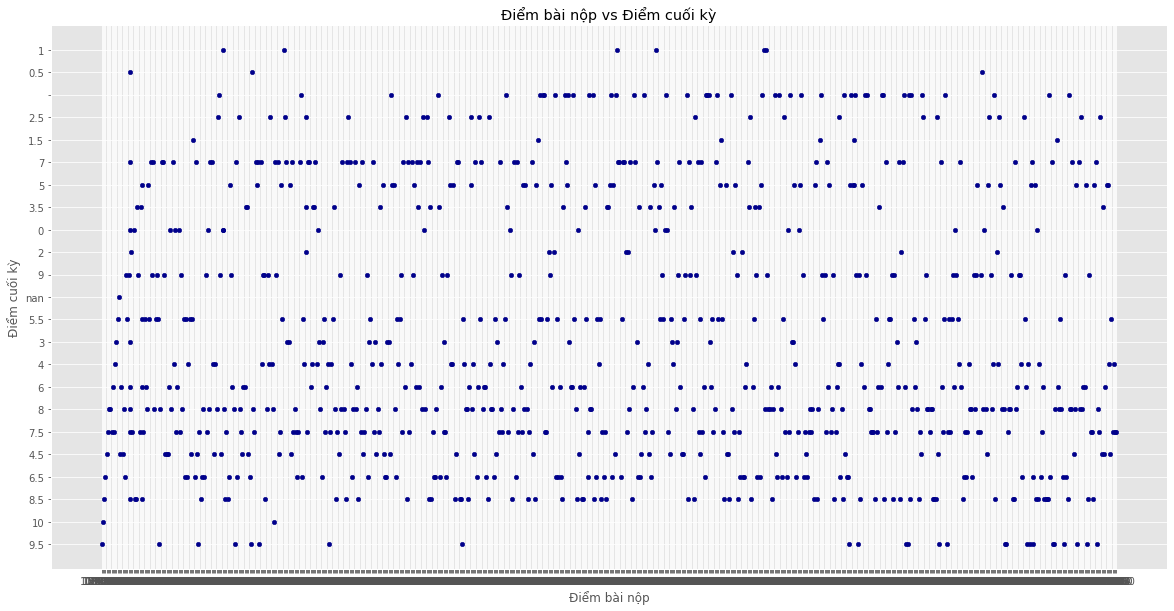

In [58]:
# Tương quan giữa điểm tổng bài nộp và điểm thi cuối kỳ
df=pd.merge(point,df1,on=['id'])  #hợp 2 bảng theo id
df=df[['Point','CK']]             #lấy 2 cột Point và CK
df=pd.DataFrame(df)
df=df.astype('str')

df.plot(kind='scatter',x='Point',y='CK',figsize=(20,10),color='darkblue')
plt.title('Điểm bài nộp vs Điểm cuối kỳ')
plt.xlabel('Điểm bài nộp')
plt.ylabel('Điểm cuối kỳ')

plt.show()